<a href="https://colab.research.google.com/github/fabiobrabo/FGV_Sol_Min_Dados/blob/main/FGV_Minera%C3%A7%C3%A3o_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho da Disciplina **Soluções de Mineração de Dados**

**Alunos:**

* CASSIANO RICARDO ERHARDT 
* FÁBIO OLIVEIRA GUIMARÃES 
* FELIPE DE MELO ROSA 
* MÁRCIO MILESKI
* MÁRCIO ROBERTO REGOS RANSOLIM 
* NILSON CESAR JUNIOR 
* WANDERSON LANGAMER DA ROCHA



# **Problema de Negócio**

Este trabalho visa resolver um problema de negócio utilizando regras de Cluster Particional. A base escolhida foi **South German Credit** presente no Datasets da UCI¹. O problema é identificar o padrão dos clientes bons pagadores.

¹*https://archive.ics.uci.edu/ml/datasets/South+German+Credit*

A base **South German Credit** tem 1000 registros com 21 variáveis, sendo 20 

***Apresentar pergunta de negócio ou análise exploratória de negócio;***

# Campos do Dataset

**1. laufkont = status**
* 1 : no checking account
* 2 : … < 0 DM
* 3 : 0<= … < 200 DM
* 4 : … >= 200 DM / salary for at least 1 year

**2. laufzeit = duration**

**3. moral = credit_history**
* 0 : delay in paying off in the past
* 1 : critical account/other credits elsewhere
* 2 : no credits taken/all credits paid back duly
* 3 : existing credits paid back duly till now
* 4 : all credits at this bank paid back duly

**4. verw = purpose**
* 0 : others
* 1 : car (new)
* 2 : car (used)
* 3 : furniture/equipment
* 4 : radio/television
* 5 : domestic appliances
* 6 : repairs
* 7 : education
* 8 : vacation
* 9 : retraining
* 10 : business

**5. hoehe = amount**

**6. sparkont = savings**
* 1 : unknown/no savings account
* 2 : … < 100 DM
* 3 : 100 <= … < 500 DM
* 4 : 500 <= … < 1000 DM
* 5 : … >= 1000 DM

**7. beszeit = employment_duration**
* 1 : unemployed
* 2 : < 1 yr
* 3 : 1 <= … < 4 yrs
* 4 : 4 <= … < 7 yrs
* 5 : >= 7 yrs

**8. rate = installment_rate**
* 1 : >= 35
* 2 : 25 <= … < 35
* 3 : 20 <= … < 25
* 4 : < 20

**9. famges = personalstatussex**
* 1 : male : divorced/separated
* 2 : female : non-single or male : single
* 3 : male : married/widowed
* 4 : female : single

**10. buerge = other_debtors**
* 1 : none
* 2 : co-applicant
* 3 : guarantor

**11. wohnzeit = present_residence**
* 1 : < 1 yr
* 2 : 1 <= … < 4 yrs
* 3 : 4 <= … < 7 yrs
* 4 : >= 7 yrs

**12. verm = property**
* 1 : unknown / no property
* 2 : car or other
* 3 : building soc. savings agr./life insurance
* 4 : real estate

**13. alter = age**

**14. weitkred = otherinstallmentplans**
1 : bank
2 : stores
3 : none

**15. wohn = housing**
* 1 : for free
* 2 : rent
* 3 : own

**16. bishkred = number_credits**
* 1 : 1
* 2 : 2-3
* 3 : 4-5
* 4 : >= 6

**17. beruf = job**
* 1 : unemployed/unskilled - non-resident
* 2 : unskilled - resident
* 3 : skilled employee/official
* 4 : manager/self-empl./highly qualif. employee

**18. pers = people_liable**
* 1 : 3 or more
* 2 : 0 to 2

**19. telef = telephone**
* 1 : no
* 2 : yes (under customer name)

**20. gastarb = foreign_worker**
* 1 : yes
* 2 : no

**21. kredit (target column) = credit_risk**
* 0 : bad
* 1 : good

In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer

In [2]:
#importando os dados

dataset = pd.read_csv("https://raw.githubusercontent.com/fabiobrabo/FGV_Sol_Min_Dados/main/SouthGermanCredit.csv")


In [3]:
# Dados importados

dataset.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


# Análise exploratória do dados

In [4]:
# Explorando os dados
# Os atributos "laufzeit", "hoehe" e "alter" são mais espaçadas, devemos "normalizá-las"

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
laufkont,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
laufzeit,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
moral,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
verw,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
hoehe,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
sparkont,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
beszeit,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
famges,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0
buerge,1000.0,1.145,0.477706,1.0,1.0,1.0,1.00,3.0


In [5]:
# Base sem nulos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


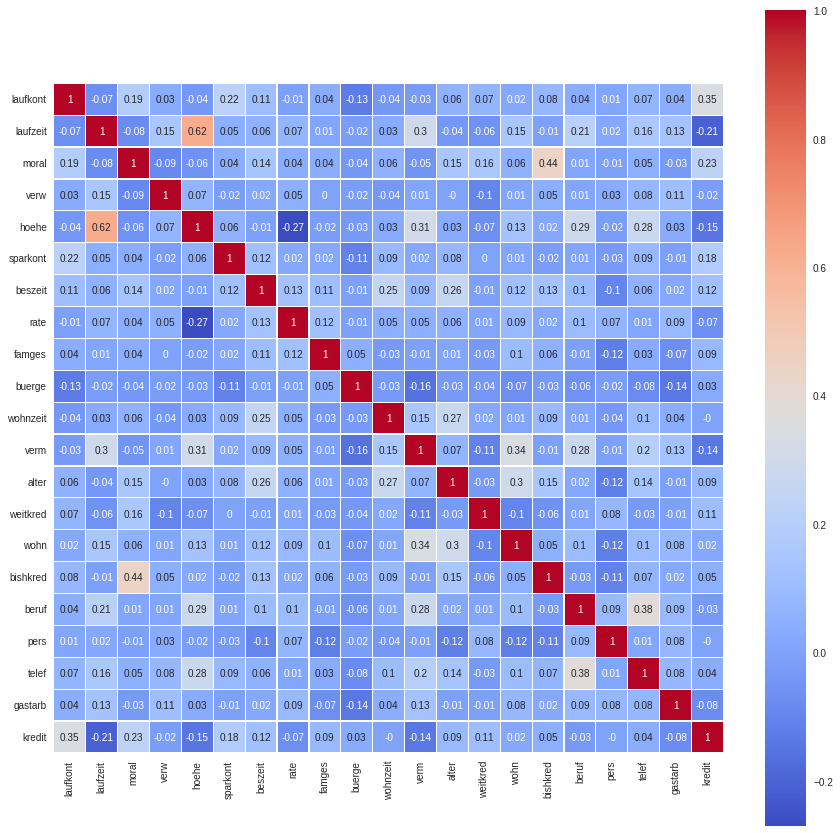

In [6]:
# Avaliando a correlação entre os atributos do dataset
# Não há, aparentemente, uma correlação forte entre os atributos, apenas entre "laufzeit" e "hoehe" que é de 62%
plt.figure(figsize=(15,15)) 
sns.heatmap(data=round(dataset.corr(),2),annot=True,linewidths=0.2,cmap='coolwarm', square=True);

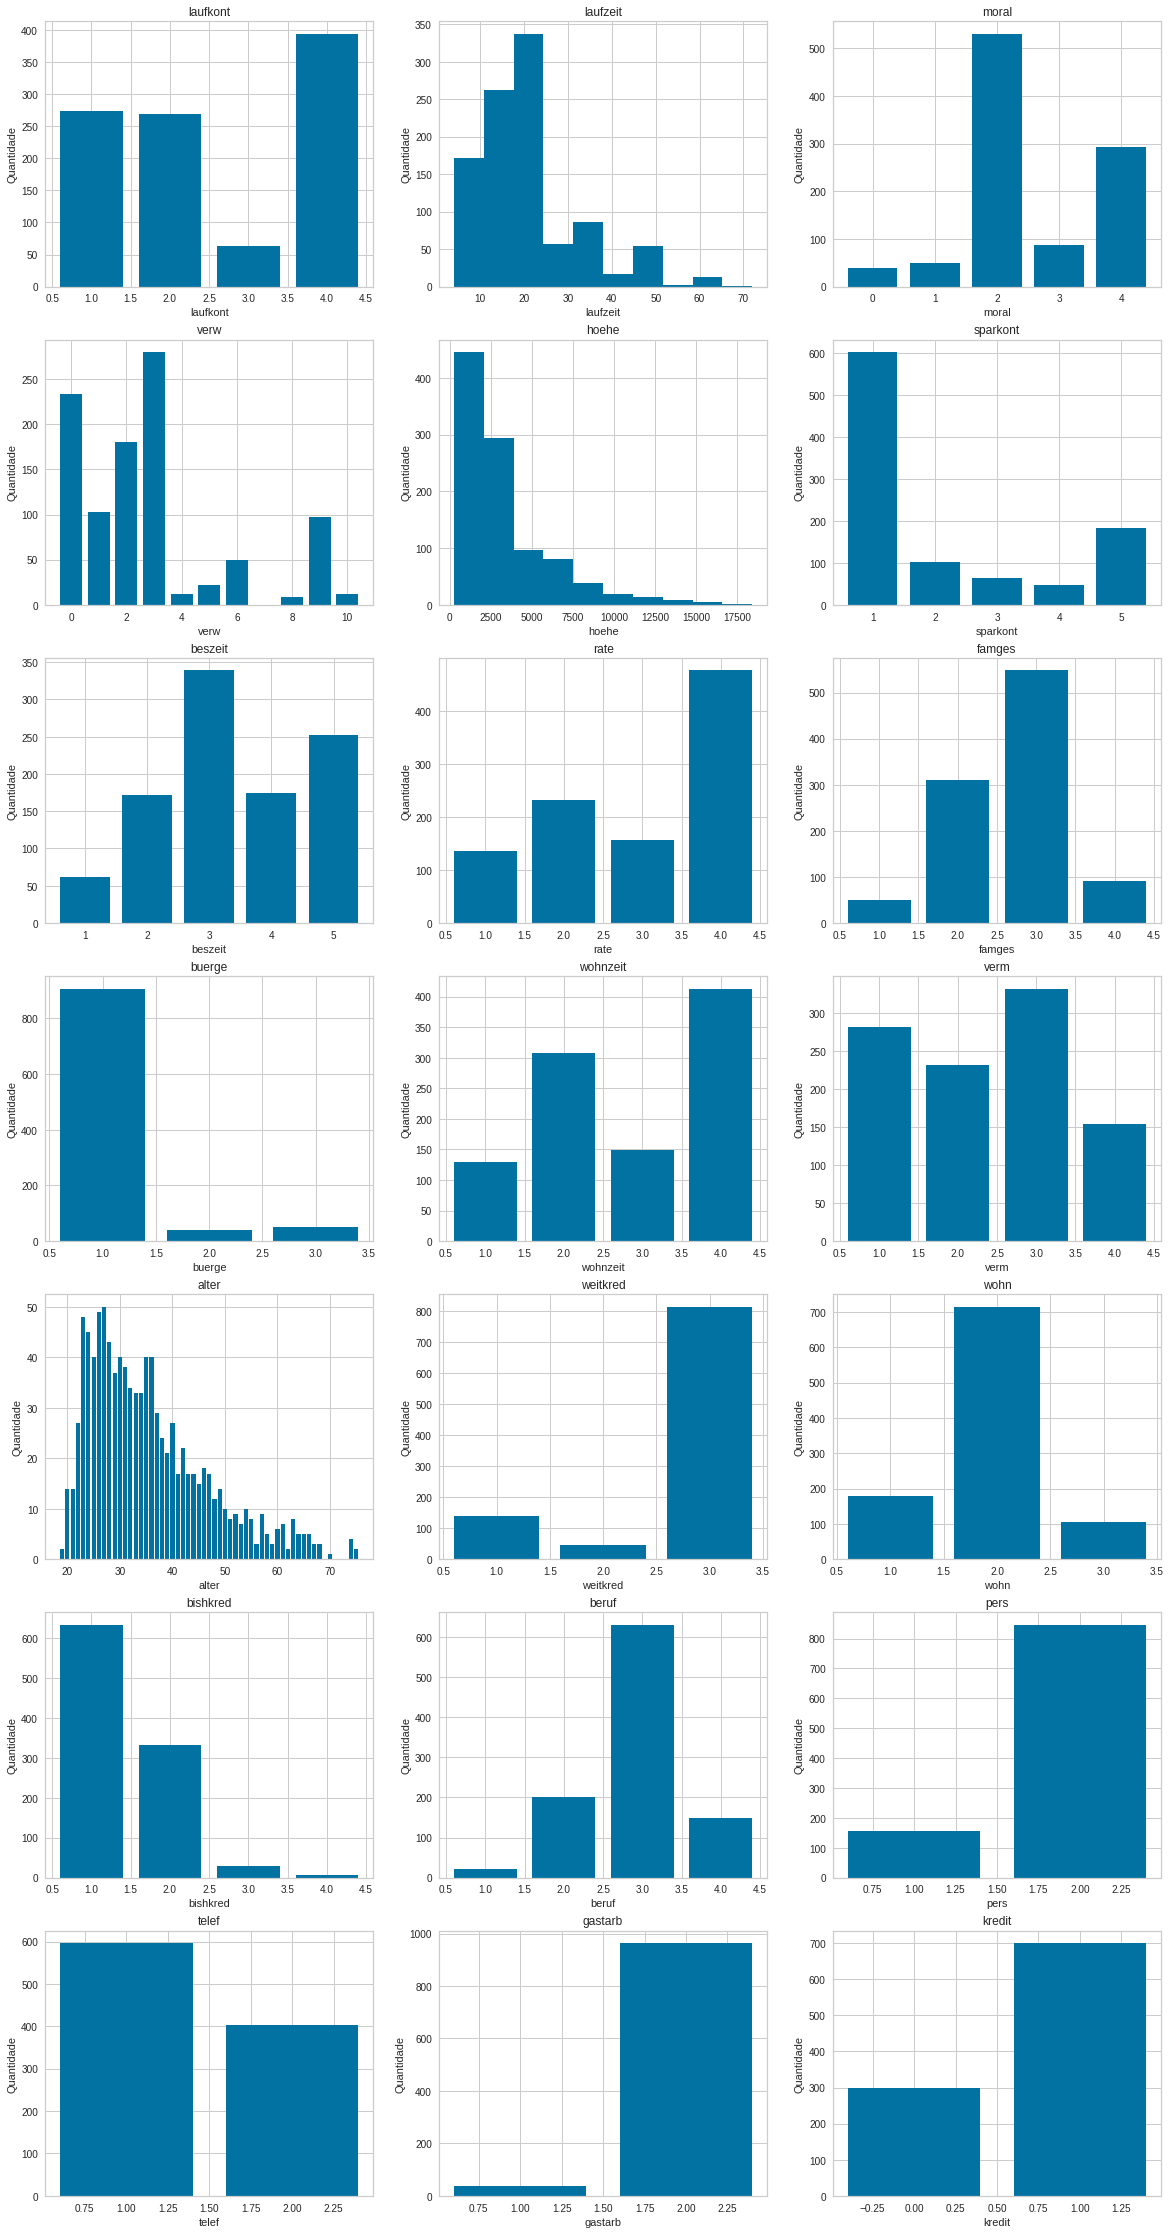

In [7]:
# Plotando Gráficos

# Define as configurações dos plots
# Cada plot terá o mesmo tamanho de figuras (20,40)
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6], [ax7, ax8, ax9], [ax10, ax11, ax12], [ax13, ax14, ax15], [ax16, ax17, ax18], [ax19, ax20, ax21]] = plt.subplots(nrows=7, ncols=3, figsize=(20,40))

# Dados para cada subplot
tabela = dataset.groupby(['laufkont'])[('laufkont')].count()
ax1.bar(tabela.index, tabela)

ax2.hist(dataset['laufzeit'], bins=10)

tabela = dataset.groupby(['moral'])[('moral')].count()
ax3.bar(tabela.index, tabela)

tabela = dataset.groupby(['verw'])[('verw')].count()
ax4.bar(tabela.index, tabela)

#tabela = dataset.groupby(['hoehe'])[('hoehe')].count()
#ax5.bar(tabela.index, tabela)

ax5.hist(dataset['hoehe'], bins=10)

tabela = dataset.groupby(['sparkont'])[('sparkont')].count()
ax6.bar(tabela.index, tabela)

tabela = dataset.groupby(['beszeit'])[('beszeit')].count()
ax7.bar(tabela.index, tabela)

tabela = dataset.groupby(['rate'])[('rate')].count()
ax8.bar(tabela.index, tabela)

tabela = dataset.groupby(['famges'])[('famges')].count()
ax9.bar(tabela.index, tabela)

tabela = dataset.groupby(['buerge'])[('buerge')].count()
ax10.bar(tabela.index, tabela)

tabela = dataset.groupby(['wohnzeit'])[('wohnzeit')].count()
ax11.bar(tabela.index, tabela)

tabela = dataset.groupby(['verm'])[('verm')].count()
ax12.bar(tabela.index, tabela)

tabela = dataset.groupby(['alter'])[('alter')].count()
ax13.bar(tabela.index, tabela)

tabela = dataset.groupby(['weitkred'])[('weitkred')].count()
ax14.bar(tabela.index, tabela)

tabela = dataset.groupby(['wohn'])[('wohn')].count()
ax15.bar(tabela.index, tabela)

tabela = dataset.groupby(['bishkred'])[('bishkred')].count()
ax16.bar(tabela.index, tabela)

tabela = dataset.groupby(['beruf'])[('beruf')].count()
ax17.bar(tabela.index, tabela)

tabela = dataset.groupby(['pers'])[('pers')].count()
ax18.bar(tabela.index, tabela)

tabela = dataset.groupby(['telef'])[('telef')].count()
ax19.bar(tabela.index, tabela)

tabela = dataset.groupby(['gastarb'])[('gastarb')].count()
ax20.bar(tabela.index, tabela)

tabela = dataset.groupby(['kredit'])[('kredit')].count()
ax21.bar(tabela.index, tabela)

ax1.set(title="laufkont", xlabel="laufkont", ylabel="Quantidade")
ax2.set(title="laufzeit", xlabel="laufzeit", ylabel="Quantidade")
ax3.set(title="moral", xlabel="moral", ylabel="Quantidade")
ax4.set(title="verw", xlabel="verw", ylabel="Quantidade")
ax5.set(title="hoehe", xlabel="hoehe", ylabel="Quantidade")
ax6.set(title="sparkont", xlabel="sparkont", ylabel="Quantidade")
ax7.set(title="beszeit", xlabel="beszeit", ylabel="Quantidade")
ax8.set(title="rate", xlabel="rate", ylabel="Quantidade")
ax9.set(title="famges", xlabel="famges", ylabel="Quantidade")
ax10.set(title="buerge", xlabel="buerge", ylabel="Quantidade")
ax11.set(title="wohnzeit", xlabel="wohnzeit", ylabel="Quantidade")
ax12.set(title="verm", xlabel="verm", ylabel="Quantidade")
ax13.set(title="alter", xlabel="alter", ylabel="Quantidade")
ax14.set(title="weitkred", xlabel="weitkred", ylabel="Quantidade")
ax15.set(title="wohn", xlabel="wohn", ylabel="Quantidade")
ax16.set(title="bishkred", xlabel="bishkred", ylabel="Quantidade")
ax17.set(title="beruf", xlabel="beruf", ylabel="Quantidade")
ax18.set(title="pers", xlabel="pers", ylabel="Quantidade")
ax19.set(title="telef", xlabel="telef", ylabel="Quantidade")
ax20.set(title="gastarb", xlabel="gastarb", ylabel="Quantidade")
ax21.set(title="kredit", xlabel="kredit", ylabel="Quantidade")

plt.show()

In [8]:
# Normalizando as variáveis principalmente devido as features ("laufzeit", "hoehe" e "alter")

d = preprocessing.normalize(dataset)
scaled_df = pd.DataFrame(d, columns=dataset.columns)
scaled_df.head()


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,0.000953,0.017152,0.003812,0.001906,0.999609,0.000953,0.001906,0.003812,0.001906,0.000953,0.003812,0.001906,0.020011,0.002859,0.000953,0.000953,0.002859,0.001906,0.000953,0.001906,0.000953
1,0.000357,0.003215,0.001429,0.000000,0.999907,0.000357,0.001072,0.000714,0.001072,0.000357,0.000714,0.000357,0.012861,0.001072,0.000357,0.000714,0.001072,0.000357,0.000357,0.000714,0.000357
2,0.002377,0.014260,0.002377,0.010695,0.999412,0.002377,0.004753,0.002377,0.002377,0.001188,0.004753,0.001188,0.027332,0.003565,0.001188,0.001188,0.002377,0.002377,0.001188,0.002377,0.001188
3,0.000471,0.005654,0.001885,0.000000,0.999807,0.000471,0.001413,0.001413,0.001413,0.000471,0.000942,0.000471,0.018375,0.001413,0.000471,0.000942,0.000942,0.000471,0.000471,0.000471,0.000471
4,0.000461,0.005526,0.001842,0.000000,0.999822,0.000461,0.001382,0.001842,0.001382,0.000461,0.001842,0.000921,0.017500,0.000461,0.000921,0.000921,0.000921,0.000921,0.000461,0.000461,0.000461


In [9]:
1/scaled_df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1049.410787,58.300599,262.352697,524.705394,1.000392,1049.410787,524.705394,262.352697,524.705394,1049.410787,262.352697,524.705394,49.971942,349.803596,1049.410787,1049.410787,349.803596,524.705394,1049.410787,524.705394,1049.410787
1,2799.259545,311.028838,699.814886,inf,1.000093,2799.259545,933.086515,1399.629772,933.086515,2799.259545,1399.629772,2799.259545,77.757210,933.086515,2799.259545,1399.629772,933.086515,2799.259545,2799.259545,1399.629772,2799.259545
2,420.747549,70.124592,420.747549,93.499455,1.000589,420.747549,210.373775,420.747549,420.747549,841.495098,210.373775,841.495098,36.586743,280.498366,841.495098,841.495098,420.747549,420.747549,841.495098,420.747549,841.495098
3,2122.409480,176.867457,530.602370,inf,1.000193,2122.409480,707.469827,707.469827,707.469827,2122.409480,1061.204740,2122.409480,54.420756,707.469827,2122.409480,1061.204740,1061.204740,2122.409480,2122.409480,2122.409480,2122.409480
4,2171.387114,180.948926,542.846779,inf,1.000178,2171.387114,723.795705,542.846779,723.795705,2171.387114,542.846779,1085.693557,57.141766,2171.387114,1085.693557,1085.693557,1085.693557,1085.693557,2171.387114,2171.387114,2171.387114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1987.275019,82.803126,993.637509,662.425006,1.000138,1987.275019,662.425006,993.637509,662.425006,1987.275019,496.818755,1987.275019,94.632144,662.425006,1987.275019,1987.275019,993.637509,1987.275019,1987.275019,993.637509,inf
996,2303.585032,95.982710,1151.792516,inf,1.000254,2303.585032,460.717006,575.896258,767.861677,1151.792516,2303.585032,2303.585032,51.190778,767.861677,1151.792516,2303.585032,767.861677,1151.792516,2303.585032,1151.792516,inf
997,3170.015063,603.812393,3170.015063,inf,1.000005,2536.012050,2536.012050,3170.015063,4226.686751,12680.060252,3170.015063,3170.015063,422.668675,4226.686751,4226.686751,12680.060252,3170.015063,6340.030126,6340.030126,6340.030126,inf
998,3234.114562,539.019094,3234.114562,2156.076375,1.000035,1293.645825,6468.229124,3234.114562,2156.076375,6468.229124,6468.229124,1617.057281,124.389022,2156.076375,3234.114562,6468.229124,1617.057281,3234.114562,3234.114562,3234.114562,inf


In [10]:
dataset

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


# Estimar modelos de clustering particional

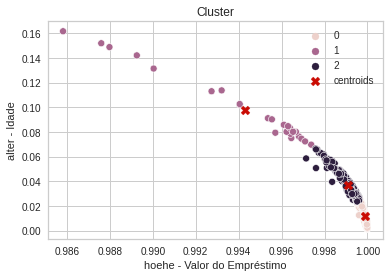

In [11]:
# Estimar modelos de clustering particional

# Ajustando o dataset
X = scaled_df.iloc[:,:]

# Gera Modelo Kmeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=0, max_iter = 500)

# Treina o Modelo
pred_y = kmeans.fit_predict(scaled_df)

# Plota o Gráfico

sns.scatterplot(data=X, x=X['hoehe'], y=X['alter'], hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,4], kmeans.cluster_centers_[:,12], 
            marker="X", c="r", s=80, label="centroids")

plt.title("Cluster")
plt.xlabel("hoehe - Valor do Empréstimo")
plt.ylabel("alter - Idade")
plt.legend()
plt.show()


In [12]:
print("Número de iterações")
print(kmeans.n_iter_)
print("Centroide dos Cluster")
print(kmeans.cluster_centers_)

Número de iterações
8
Centroide dos Cluster
[[9.32253476e-04 7.12619688e-03 9.03161916e-04 9.93460595e-04
  9.99874088e-01 7.26117895e-04 1.16713426e-03 1.06651859e-03
  9.56147863e-04 4.12408427e-04 9.72637458e-04 8.27472734e-04
  1.14957085e-02 9.77597163e-04 6.66611546e-04 4.84023202e-04
  1.05547707e-03 6.74559586e-04 4.98299532e-04 7.07990577e-04
  2.62067232e-04]
 [5.27335380e-03 1.99179112e-02 5.58971684e-03 4.49249047e-03
  9.94289249e-01 4.41276170e-03 8.11358721e-03 7.36834424e-03
  5.57634616e-03 2.16847244e-03 6.41917830e-03 3.59400942e-03
  9.79597571e-02 5.45312522e-03 3.93476456e-03 3.40263092e-03
  5.12395739e-03 4.04890798e-03 2.55886043e-03 4.12524761e-03
  1.95438596e-03]
 [2.51197513e-03 1.27596799e-02 2.52669599e-03 2.90495374e-03
  9.99106974e-01 2.02516539e-03 3.39980135e-03 3.36274499e-03
  2.71931459e-03 1.16540405e-03 2.90473752e-03 2.00381568e-03
  3.67000933e-02 2.60263707e-03 1.91828888e-03 1.40037678e-03
  2.59880977e-03 1.79689691e-03 1.24371984e-03 1.923

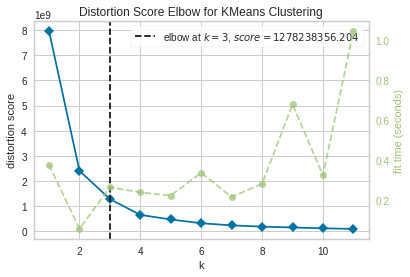

In [13]:
# Verificar pela curva do cotovelo qual é o melhor quantidade de cluster
# Encotramos pela curva do cotovelo o número de 3 clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(dataset)
visualizer.show()


# Escolher o melhor cluster e justificar

In [14]:
# Escolher o melhor cluster e justificar

X = scaled_df.drop(['kredit'], axis=1)
y = scaled_df['kredit']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
f_classif = SelectKBest(score_func=f_classif, k=4)
fit = f_classif.fit(X,y)
features = fit.transform(X)

# Visualizando as features:
cols = fit.get_support(indices=True)
scaled_df.iloc[:,cols]

# Variáveis escolhidas laufkont 	moral 	hoehe 	bishkred

,laufkont,moral,hoehe,bishkred
0,0.000953,0.003812,0.999609,0.000953
1,0.000357,0.001429,0.999907,0.000714
2,0.002377,0.002377,0.999412,0.001188
3,0.000471,0.001885,0.999807,0.000942
4,0.000461,0.001842,0.999822,0.000921
...,...,...,...,...
995,0.000503,0.001006,0.999862,0.000503
996,0.000434,0.000868,0.999746,0.000434
997,0.000315,0.000315,0.999995,0.000079
998,0.000309,0.000309,0.999965,0.000155


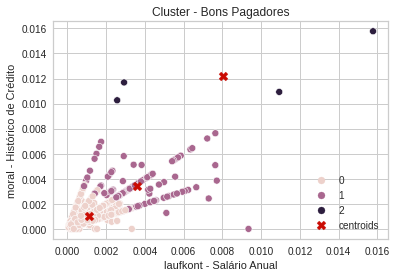

In [15]:
# Estimar modelos de clustering particional Final

#Filtrando os dados
filtrado_bom_pagador = scaled_df[scaled_df['kredit']!=0]

#Escolhendo as features laufkont(Salário Anual), moral(Histórico de Crédito),	hoehe(Valor de Crédito), bishkred(Número de Créditos Realizados)

filtrado = filtrado_bom_pagador[['laufkont', 'moral', 'hoehe', 'bishkred']]

# Ajustando o dataset
X = filtrado.iloc[:,:]

# Gera Modelo Kmeans
kmeans2 = KMeans(n_clusters = 3, init = 'k-means++', random_state=0, max_iter = 500)

# Treina o Modelo
pred_y = kmeans2.fit_predict(X)

# Plota o Gráfico

sns.scatterplot(data=X, x=X['laufkont'], y=X['moral'], hue=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")

plt.title("Cluster - Bons Pagadores")
plt.xlabel("laufkont - Salário Anual")
plt.ylabel("moral - Histórico de Crédito")
plt.legend()
plt.show()

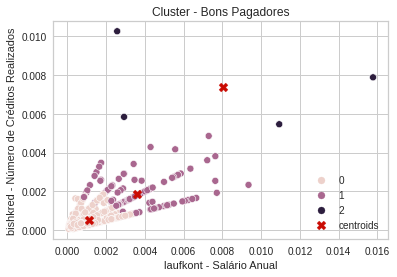

In [16]:
# Plota o Gráfico

sns.scatterplot(data=X, x=X['laufkont'], y=X['bishkred'], hue=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,3], 
            marker="X", c="r", s=80, label="centroids")

plt.title("Cluster - Bons Pagadores")
plt.xlabel("laufkont - Salário Anual")
plt.ylabel("bishkred - Número de Créditos Realizados")
plt.legend()
plt.show()

In [17]:
print("Número de iterações")
print(kmeans2.n_iter_)
print("Centroide dos Cluster")
print(kmeans2.cluster_centers_)

Número de iterações
16
Centroide dos Cluster
[[1.12184719e-03 1.03583878e-03 9.99804191e-01 5.40064719e-04]
 [3.59602356e-03 3.43717582e-03 9.98532211e-01 1.85877434e-03]
 [8.04804787e-03 1.21641067e-02 9.87664110e-01 7.36514691e-03]]


# Conclusão sobre os resultados e seu impacto na pergunta de negócio do item 1.

A partir de uma seleção de variáveis (SelectKBest) determinamos as 4 variáveis mais relevantes para a base, sendo elas: **laufkont(Salário Anual), moral(Histórico de Crédito),	hoehe(Valor de Crédito), bishkred(Número de Créditos Realizados)**. Depois, a partir da curva do cotovelo encontramos a quantidade de 3 cluster para a base.

Com as features selecionadas plotamos alguns gráficos em duas dimensões e visualmente laufkont(Salário) e moral(Histórico de Crédito) dividiram bem os 3 clusters. Para facilitar o entedimento nomeamos os cluster dos bons pagadores da seguinte forma:
* 1 - Baixa Renda, Poucos Empréstimos Realizados no Banco e Empréstimos no Concorrente;
* 2 - Renda Média, Alguns Empréstimos Realizados no Banco e Empréstimos em Dia;
* 3 - Alta Renda, Muitos Empréstimos Realizados no Banco e Sem Empréstimos no Banco).

Com essa segmentação fica mais fácil fazer campanhas de crédito, principalmente, de controle de Inadimplência que deve ser focado nos clientes do primeiro cluster que já possuem algum crédito em atraso ou credito no concorrente.
